# What factors impact on life expectancy of countries？

In [1]:
import time
start_time = time.time()

## 1.Introduction

Life expectancy refers to the average number of years that people born in the same year can expect to continue to live if the current mortality rate of each age group remains unchanged. What needs to be pointed out is that the life expectancy data provided by literature and websites, including the data set used in this notebook, refer to the life expectancy of 0-year-old babies born in the year in which the data is given. This is an indicator calculated on the basis of the current mortality rate of each age group.

Life expectancy is the indicator to measure the health of a country or region. At the same time, it can reflect the general quality of life in a society. This is because people’s life span is often restricted by socio-economic conditions and medical standards. Life expectancy is an important indicator, so it is very valuable to find out the factors related to the difference in life expectancy among different countries or regions in the world.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In addition to the libraries used in the CASA0003, CASA0006 and CASA0007 modules, I import `winsorize` from `scipy.stats.mstats` to deal with outliers in variables.

## 2.Literature Rivew

There are huge differences in the life expectancy of groups in both different times and places(Roser, Ortiz-Ospina and Ritchie, 2013). Before modernization, the average life expectancy all over the world was 30 years and by the 19th century, this value had doubled.There are many countries in the world where life expectancy is in the range of 50-60 years, while it in Japan has exceeded 80 years for many years.

Faced with such a huge difference in life expectancy, researchers have been trying to find relevant factors that affect life expectancy such as the gender factor(Ortiz-Ospina and Beltekian, 2018).

Regression analysis is often used to quantitatively analyze the relationship between life expectancy and its related variables. Sede and Ohemeng used regression models to analyze the relationship between life expectancy in Nigeria and socio-economic factors (Sede and Ohemeng, 2015). They believe factors including government health expenditure, unemployment and measures to halt the depreciation of the currancy, really impact on life expectancy.

In Gulis’s study, the linear regression model reflects that the most significant factors for life expectancy are the literacy and access to safe drinking water (Gulis, 2000).

Li, Maduro and Begier used logistic regression to study the life expectancy in New York City during 2001-2010 (Li, Maduro and Begier, 2016). They mainly focused on the impact of different causes of death on life expectancy.

Researchers mainly focused on socioeconomic factors, health factors, and mortality and we find that important immunization data which is contained in the dateset used by this notebook is rarely considered in regression models.

## 3.Research Question

In this analysis, there are the following research questions：

1.What factors impact on life expectancy of different countries in the same year and how to quantify their impact?

2.Which model has done a greater job in fitting the relationship between the response and predictors？

3.What other help do the method used have for the life expectancy dataset?

## 4.Presentation of Data

### Data Source
The dataset used in the analysis comes from kaggle. 
The original data can be downloaded from this link：https://www.kaggle.com/kumarajarshi/life-expectancy-who

### Variables Description
From the introduction given by the data provider, we can get a list of the variables:

- **'Country'**: the area where the data is collected.
- **'Year'**: the time the data was collected.
- **'Status'**: indicator whether the country is developed or developing.
- **'Life Expectancy'**: life expectancy in age.
- **'Adult Mortality'**: adult mortality rates of both sexes.
- **'Infant Deaths'**: number of infant deaths per 1000 population.
- **'Alcohol'**: alcohol, recorded per capita (15+) consumption.
- **'Percentage Expenditure'**: expenditure on health as a percentage of Gross Domestic Product per capita(%).
- **'Hepatitis B'**: hepatitis B (hepB) immunization coverage among 1-year-olds (%).
- **'Measles'**:number of reported cases per 1000 population.
- **'BMI'**: average Body Mass Index of entire population.
- **'Under-five Deaths'**: number of under-five deaths per 1000 population.
- **'Polio'**: polio (Pol3) immunization coverage among 1-year-olds (%).
- **'Total Expenditure'**: general government expenditure on health as a percentage of total government expenditure (%).
- **'Diphtheria'**: diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%).
- **'HIV/AIDS'**: deaths per 1 000 live births HIV/AIDS (0-4 years).
- **'GDP'**: Gross Domestic Product per capita (in USD).
- **'Population'**: population of the country.
- **'Thinness 1-19 years'**: prevalence of thinness among children and adolescents for Age 10 to 19 (% ).
- **'Thinness 5-9 years'**: prevalence of thinness among children for Age 5 to 9(%).
- **'Income Romposition of Resource'**: human Development Index in terms of income composition of resources (index ranging from 0 to 1).
- **'Schooling'**: number of years of Schooling(years).




### Data Processing

#### Data Import
We have uploaded the original dataset to github and used the link to load it in the notebook.

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/Qiu90s/UCL-CASA/main/CASA0006%20Final/Life%20Expectancy%20Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0000,263.0000,62,0.0100,71.2796,65.0000,1154,...,6.0000,8.1600,65.0000,0.1000,584.2592,"33,736,494.0000",17.2000,17.3000,0.4790,10.1000
1,Afghanistan,2014,Developing,59.9000,271.0000,64,0.0100,73.5236,62.0000,492,...,58.0000,8.1800,62.0000,0.1000,612.6965,"327,582.0000",17.5000,17.5000,0.4760,10.0000
2,Afghanistan,2013,Developing,59.9000,268.0000,66,0.0100,73.2192,64.0000,430,...,62.0000,8.1300,64.0000,0.1000,631.7450,"31,731,688.0000",17.7000,17.7000,0.4700,9.9000
3,Afghanistan,2012,Developing,59.5000,272.0000,69,0.0100,78.1842,67.0000,2787,...,67.0000,8.5200,67.0000,0.1000,669.9590,"3,696,958.0000",17.9000,18.0000,0.4630,9.8000
4,Afghanistan,2011,Developing,59.2000,275.0000,71,0.0100,7.0971,68.0000,3013,...,68.0000,7.8700,68.0000,0.1000,63.5372,"2,978,599.0000",18.2000,18.2000,0.4540,9.5000


#### Data Cleaning

We use the `info()` function to explore the information of the original dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Firstly we use `isna()` to count missing values corresponding to all columns.

In [5]:
for each in data.columns:
    print(each,len(data[data[each].isna()==True]))

Country 0
Year 0
Status 0
Life expectancy  10
Adult Mortality 10
infant deaths 0
Alcohol 194
percentage expenditure 0
Hepatitis B 553
Measles  0
 BMI  34
under-five deaths  0
Polio 19
Total expenditure 226
Diphtheria  19
 HIV/AIDS 0
GDP 448
Population 652
 thinness  1-19 years 34
 thinness 5-9 years 34
Income composition of resources 167
Schooling 163


Then we use `dropna()` and `drop_duplicates()` functions to remove rows with missing values and completely duplicate rows, respectively. Because the same row is the same data in the same country and year, it is useless. Use `shape()` to get the dimension of the dataset.

In [6]:
print("Before",data.shape)
data=data.dropna().drop_duplicates() #Remove duplicate values and null values
print("After",data.shape)

Before (2938, 22)
After (1649, 22)


#### Converting categorical variables

We know from the previous information of dataset that only variable `Status`'s dtype is `object`. It is the only categorical variable needs to be processed. Before dealing with it, check the number of categories of this variable.

In [7]:
Categories_of_Status = list(data['Status'].value_counts().index)
print(Categories_of_Status)

['Developing', 'Developed']


Although the method given in the workshop is `One-Hot Encoding`, the categorical variable in this dataset is relatively simple and we assign the two categories **Developing** and **Developed** to 0 and 1 respectively.

In [8]:
data['Status']=data['Status'].map({'Developing':0,'Developed':1})

In [9]:
data=data.set_index(['Country'])
data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,0,65.0000,263.0000,62,0.0100,71.2796,65.0000,1154,19.1000,...,6.0000,8.1600,65.0000,0.1000,584.2592,"33,736,494.0000",17.2000,17.3000,0.4790,10.1000
Afghanistan,2014,0,59.9000,271.0000,64,0.0100,73.5236,62.0000,492,18.6000,...,58.0000,8.1800,62.0000,0.1000,612.6965,"327,582.0000",17.5000,17.5000,0.4760,10.0000
Afghanistan,2013,0,59.9000,268.0000,66,0.0100,73.2192,64.0000,430,18.1000,...,62.0000,8.1300,64.0000,0.1000,631.7450,"31,731,688.0000",17.7000,17.7000,0.4700,9.9000
Afghanistan,2012,0,59.5000,272.0000,69,0.0100,78.1842,67.0000,2787,17.6000,...,67.0000,8.5200,67.0000,0.1000,669.9590,"3,696,958.0000",17.9000,18.0000,0.4630,9.8000
Afghanistan,2011,0,59.2000,275.0000,71,0.0100,7.0971,68.0000,3013,17.2000,...,68.0000,7.8700,68.0000,0.1000,63.5372,"2,978,599.0000",18.2000,18.2000,0.4540,9.5000


#### Choosing Time Period for Research

In this analysis, we hope to choose data of the one year as the research dataset. The sample size is the choosing criterion. Here is the sample size corresponding to each year in the current dataset.

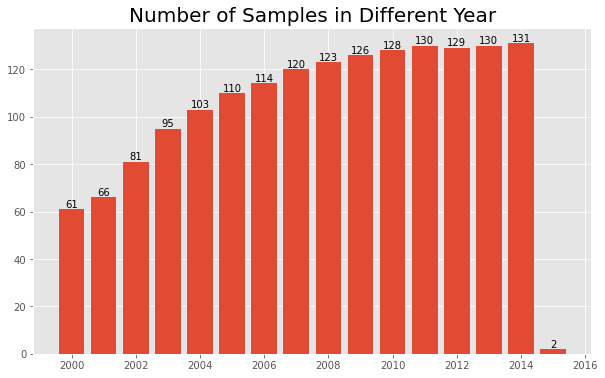

In [10]:
year_data=data.groupby('Year').count()
plt.figure(figsize=(10,6))
plt.bar(year_data.index,year_data.Status)
plt.title('Number of Samples in Different Year', fontsize=20)
for a, b in zip(year_data.index,year_data.Status):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=10)

According to the information in the figure above, we choose 2014 as the main research year.

In [11]:
data=data[data['Year']==2014]
del data['Year']
data.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,59.9000,271.0000,64,0.0100,73.5236,62.0000,492,18.6000,86,58.0000,8.1800,62.0000,0.1000,612.6965,"327,582.0000",17.5000,17.5000,0.4760,10.0000
Albania,0,77.5000,8.0000,0,4.5100,428.7491,98.0000,0,57.2000,1,98.0000,5.8800,98.0000,0.1000,"4,575.7638","288,914.0000",1.2000,1.3000,0.7610,14.2000
Algeria,0,75.4000,11.0000,21,0.0100,54.2373,95.0000,0,58.4000,24,95.0000,7.2100,95.0000,0.1000,547.8517,"39,113,313.0000",6.0000,5.8000,0.7410,14.4000
Angola,0,51.7000,348.0000,67,8.3300,23.9656,64.0000,11699,22.7000,101,68.0000,3.3100,64.0000,2.0000,479.3122,"2,692,466.0000",8.5000,8.3000,0.5270,11.4000
Argentina,0,76.2000,118.0000,8,7.9300,847.3717,94.0000,1,62.2000,9,92.0000,4.7900,94.0000,0.1000,"12,245.2565","42,981,515.0000",1.0000,0.9000,0.8250,17.3000


#### Handling Outliers

Inspired by some examples on kaggle, for dataset with many variables, we use `winsorize` to deal with outliers. [Here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html) is the official document. In this process, the 1% of the lowest value and the 1% of the highest values are replaced with corresponding critical values.

In [12]:
for each in data.columns[1:]:
    data[each]=winsorize(data[each], limits=[0.01,0.01]) #winsorize

We use the `describe()` function to display statistical indicators of variables in the dataset.

In [13]:
data.describe()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000,131.0000
mean,0.1450,70.5473,159.9542,25.0000,3.0514,809.0054,81.7328,"1,884.7328",40.4641,34.8702,83.4962,6.0942,83.9084,0.7939,"6,822.1532","14,339,894.5400",4.5916,4.8282,0.6696,12.6702
std,0.3535,8.5386,108.7202,70.8057,4.0632,"1,794.5808",23.6880,"8,685.7508",20.6921,104.1170,20.9664,2.4938,21.7547,1.4819,"12,000.1250","39,174,005.4089",4.1758,4.2955,0.1511,2.6963
min,0.0000,51.7000,6.0000,0.0000,0.0100,1.4433,5.0000,0.0000,2.8000,0.0000,8.0000,1.3700,5.0000,0.1000,25.4484,"2,771.0000",0.1000,0.1000,0.3450,6.3000
25%,0.0000,64.6500,74.5000,0.0000,0.0100,48.3114,78.0000,0.0000,22.8500,1.0000,78.0000,4.4850,80.0000,0.1000,554.9245,"287,600.5000",1.5000,1.5500,0.5440,10.7500
50%,0.0000,72.0000,144.0000,3.0000,0.0100,198.7343,91.0000,10.0000,45.9000,3.0000,92.0000,5.8200,92.0000,0.1000,"2,522.7968","1,562,974.0000",3.3000,3.5000,0.6970,12.7000
75%,0.0000,75.8000,225.0000,20.0000,6.3050,718.3236,96.0000,289.5000,59.4500,25.5000,97.0000,7.6300,97.0000,0.5000,"7,438.0538","8,059,265.0000",6.6500,6.8000,0.7790,14.7000
max,1.0000,89.0000,463.0000,490.0000,13.9400,"10,769.3630",99.0000,"58,848.0000",74.8000,759.0000,99.0000,11.9300,99.0000,7.3000,"62,214.6912","255,131,116.0000",19.4000,19.8000,0.9230,18.6000


Then we give the basic information of the research dataset.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, Afghanistan to Zimbabwe
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           131 non-null    int64  
 1   Life expectancy                  131 non-null    float64
 2   Adult Mortality                  131 non-null    float64
 3   infant deaths                    131 non-null    int64  
 4   Alcohol                          131 non-null    float64
 5   percentage expenditure           131 non-null    float64
 6   Hepatitis B                      131 non-null    float64
 7   Measles                          131 non-null    int64  
 8    BMI                             131 non-null    float64
 9   under-five deaths                131 non-null    int64  
 10  Polio                            131 non-null    float64
 11  Total expenditure                131 non-null    float64
 12  Diphtheria  

#### Data Visualization

Here we use the following code to generate a data set for visualization，named `data_for_vis`.

In [15]:
c_for_vis=['Life expectancy ','Status', 'Adult Mortality', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', ' HIV/AIDS', ' thinness  1-19 years']
data_for_vis=data.loc[:,c_for_vis].reset_index()

We use the `seaborn` method to draw the distribution histogram of the dependent variable life expectancy.

<AxesSubplot:title={'center':'Histogram of Life Expectancy'}, xlabel='Life expectancy ', ylabel='Count'>

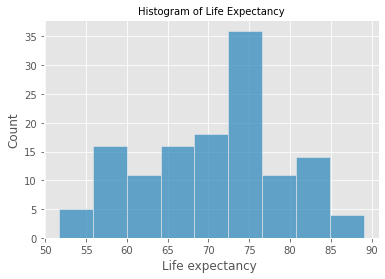

In [16]:
plt.title('Histogram of Life Expectancy', fontsize=10)
sns.histplot(data_for_vis['Life expectancy ']) #All countries in the data set

<AxesSubplot:title={'center':'Histogram of Life Expectancy in Developing Countries'}, xlabel='Life expectancy ', ylabel='Count'>

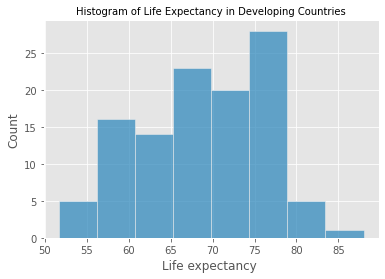

In [17]:
plt.title('Histogram of Life Expectancy in Developing Countries', fontsize=10)
sns.histplot(data_for_vis[data_for_vis['Status']==0]['Life expectancy '])#['Status']==0

<AxesSubplot:title={'center':'Histogram of Life Expectancy in Developed Countries'}, xlabel='Life expectancy ', ylabel='Count'>

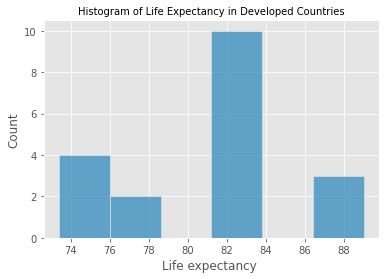

In [18]:
plt.title('Histogram of Life Expectancy in Developed Countries', fontsize=10)
sns.histplot(data_for_vis[data_for_vis['Status']==1]['Life expectancy '])#['Status']==1

From the visualization above, we can find that the distribution of the **‘life expectancy'** as dependent variable is approximately normal. The distribution of **‘life expectancy'** in developing countries is also close to the normal distribution, while the distribution in developed countries is not normal due to the small sample size.

## 5.Methodology

In order to answer the previous research questions, we firstly use 4 regression models, namely linear regression, lasso, regression tree and random forest. 

Linear regression and lasso will help us select the significant variables related to changes in life expectancy and explain the relationship among data. 

The **R2** scores obtained in the process helps explain which model has done a greatest job in fitting the relationship between the response and predictors. 

In addtion, random forest method is both powerful for regression and classification. We will make a random forest classifier and estimate its performance.

It is worth mentioning that this analysis will not focus on estimatie of prediction performance of regressors, so we do not split the data set for the regressors. In this analysis, we mainly focus on exploring relationship among variables by regression and use all the data of 2014, as I believe the same relationship will apply to the whole dataset. In the correct workflow for prediction, to make a reliable prediction, dataset should be split at first. The comparison of model performance on different subsets can tell whether the model is overfitted or underfitted and whether we should adjust the model. I will split the dataset into a training set and a test set before building the classifier and use cross validation to tune its hyperparamete.

### Linear Regression

#### Dealing with multicollinearity

`Collinearity` is the problem when two variables are highly correlated. Because they contain similar information, they are not suitable as model variables. Generally, we use correlation matrix to detect obviously correlated variables.

Text(0.5, 1.0, 'Correlation Matrix')

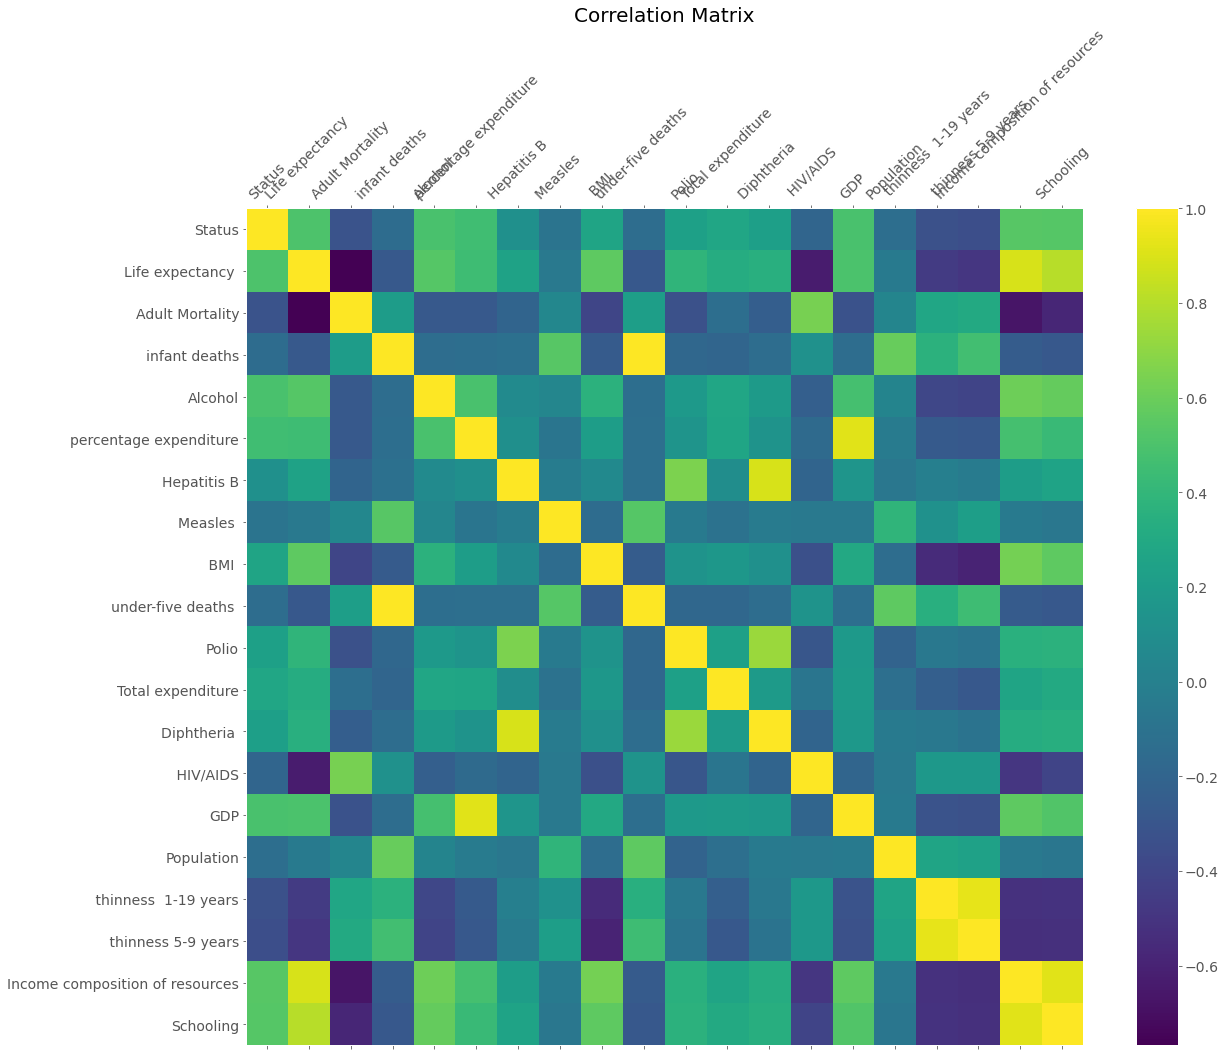

In [19]:
df = data
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16)
plt.title('Correlation Matrix', fontsize=20)

`Multicollinearity` emerges when three or more variables, which are highly correlated, are included in a model. Multicollinearity will cause the regression relationship established by the model to be unreliable and the correlation matrix cannot deal with it. 

We can use the **VIF** method before establishing simple linear regression. VIF refers to the `Variance Inflation Factor`, which is a measure of the multicollinearity among the variables in a regression model. We can calculate VIF for each variable and remove the variable with highest VIF exceeding a certain threshold. After deleting, recalculate the VIF value of the remaining variables, and loop until no VIF exceeds the threshold.

We use the following code to calculate VIF and remove inappropriate variables.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [21]:
predictors = data.drop('Life expectancy ', axis=1)
Life_expectancy = data['Life expectancy ']
list_var_not_to_remove = ['Status']

We use the following code to drop inappropriate variables and display the selected variables.

In [22]:
df_predictors_select_VIF = drop_column_using_vif_(predictors, list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: 109.82896303326434
Dropping: infant deaths
Max VIF: 11.218323017509892
Dropping: Income composition of resources
Max VIF: 10.951392031084712
Dropping:  thinness 5-9 years
Max VIF: 8.600864270566053
Dropping: GDP
Max VIF: 6.9896687000945406
Dropping: Diphtheria 
Max VIF: 2.9925578174177607
Dropping: Schooling
Max VIF: 2.118356989065703
The columns remaining after VIF selection are:
Index(['Status', 'Adult Mortality', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', ' HIV/AIDS', 'Population',
       ' thinness  1-19 years'],
      dtype='object')


In [23]:
df_predictors_select_VIF.head()

,Status,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,HIV/AIDS,Population,thinness 1-19 years
Country,,,,,,,,,,,,,
Afghanistan,0,271.0000,0.0100,73.5236,62.0000,492,18.6000,86,58.0000,8.1800,0.1000,"327,582.0000",17.5000
Albania,0,8.0000,4.5100,428.7491,98.0000,0,57.2000,1,98.0000,5.8800,0.1000,"288,914.0000",1.2000
Algeria,0,11.0000,0.0100,54.2373,95.0000,0,58.4000,24,95.0000,7.2100,0.1000,"39,113,313.0000",6.0000
Angola,0,348.0000,8.3300,23.9656,64.0000,11699,22.7000,101,68.0000,3.3100,2.0000,"2,692,466.0000",8.5000
Argentina,0,118.0000,7.9300,847.3717,94.0000,1,62.2000,9,92.0000,4.7900,0.1000,"42,981,515.0000",1.0000


#### Establish Simple Linear Regression Model

After dealing with multicollinearity, we start to build the model, using the `sklearn` package

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=Life_expectancy)

LinearRegression()

After creating the fit, we use the following code to view the constant terms and the coefficients of the variables in the model.

In [25]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": df_predictors_select_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  67.99377625560196
                       var                                     coef
0                   Status                                   3.0489
1          Adult Mortality                                  -0.0325
2                  Alcohol                                   0.2681
3   percentage expenditure                                   0.0004
4              Hepatitis B                                   0.0132
5                 Measles                                    0.0000
6                     BMI                                    0.0629
7       under-five deaths                                   -0.0058
8                    Polio                                   0.0239
9        Total expenditure                                   0.3460
10                HIV/AIDS                                  -1.0716
11              Population                                   0.0000
12    thinness  1-19 years                                  -0.1718


Further we hope to be able to view the R2 score of the model to know the goodness of the model fits. We use the following code.

In [26]:
print('R2 score:')
lr.score(X=df_predictors_select_VIF, y=Life_expectancy)

R2 score:


0.8107611764927484

We can see that the **R2** value of 0.81 is quite high, which means that 81% of the variance in independent variable (life expectancy) can be explained by the predictors used in the linear regression model.

In order to answer the research question in the **'Results and Discussion'** part, we need to use **P-value** to define variables that have a significant impact on life expectancy. We import `statsmodel` and use `summary()` function to get the p-value.

In [27]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog=Life_expectancy, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     38.56
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           4.00e-36
Time:                        15:51:30   Log-Likelihood:                -357.28
No. Observations:                 131   AIC:                             742.6
Df Residuals:                     117   BIC:                             782.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     67.9938      2.291     29.673      0.000      63.456      72.532
Status                     3.0489      1.218      2.503      0.014       0.636       5.462
Adult Mortality           -0.0325      0.004     -7.258      0.000      -0.041      -0.024
Alcohol                    0.2681      0.113      2.378      0.019       0.045       0.491
percentage expenditure     0.0004      0.000      1.751      0.083   -5.38e-05       0.001
Hepatitis B                0.0132      0.019      0.685      0.494      -0.025       0.051
Measles                 3.094e-05   4.87e-05      0.635      0.526   -6.55e-05       0.000
 BMI                       0.0629      0.022      2.922      0.004       0.020       0.106
under-five deaths         -0.0058      0.005     -1.235      0.219      -0.015       0.004
Polio                      0.0239      0.024      1.003      0.318      -0.023       0.071
Total expenditure          0.3460      0.151      2.291      0.024       0.047       0.645
 HIV/AIDS                 -1.0716      0.313     -3.428      0.001      -1.691      -0.453
Population              1.488e-08   1.14e-08      1.306      0.194   -7.68e-09    3.74e-08
 thinness  1-19 years     -0.1718      0.109     -1.574      0.118      -0.388       0.044
==============================================================================
Omnibus:                        1.682   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.266
Skew:                          -0.221   Prob(JB):                        0.531
Kurtosis:                       3.190   Cond. No.                     2.79e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lasso Model

Lasso is the **least absolute shrinkage and selection operator**. It perform feature selection using a penalty function and it can help to reduce number of predictors in linear models. (So is **VIF**). We can directly establish a lasso model without using VIF method. It should be noted that predictors must be normalised in the lasso model, which can be done using this function by setting `normalize=True`.

In [28]:
from sklearn import linear_model
# increase the max_iter to guarantee convergence
lasso_model = linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=predictors, y=Life_expectancy)

Lasso(max_iter=100000000.0, normalize=True)

We use the `score()` function to view the R2 score of the lasso model.

In [29]:
print('R2 score:')
lasso_model.score(X=predictors, y=Life_expectancy)

R2 score:


0.0

#### Adjust Alpha Value

The **R2** score is 0, which may indicate that the Lasso model is not suitable for this dataset. However, we know that when the alpha value comes to 0, lasso linear regression can be regarded as a simple linear regression, which has been proven to fit well on this data set. 

`alpha` value defaults in Lasso function provided by `sklearn` may be the cause of the bad **R2** score. We followed the official documents to adjust the value of `alpha`. We use `lassoCV()`, which is a Lasso linear model with iterative fitting along a regularization path. The `esp` means length of the path and `n_alphas` means number of alphas along the regularization path.

In [30]:
from sklearn.linear_model import LassoCV
lasso_model2 = LassoCV(eps=1e-3, n_alphas=1000, normalize = True).fit(X=predictors, y=Life_expectancy)
print('R2 score:')
lasso_model2.score(X=predictors, y=Life_expectancy)

R2 score:


0.8825329078655313

We use `alpha_` function to get the amount of penalization chosen by cross validation.

In [31]:
print('Best alpha')
best_alpha = lasso_model2.alpha_
print(best_alpha)

Best alpha
0.017129818337261862


In the given alpha fitting range in `lassoCV` function, the best `alpha` value is 0.017. At the same time, **R2** scores of this lasso model is 0.8825.  It looks like the Lasso model has done a great job in fitting the relationship between the response and predictors. Then we use the `coef_` function to get the coefficients of variables.

In [32]:
# print(lasso_model.coef_)
df_coef_lasso = pd.DataFrame({"var": predictors.columns.values, "coef":lasso_model2.coef_})
print(df_coef_lasso)

                                var                                     coef
0                            Status                                   0.6688
1                   Adult Mortality                                  -0.0165
2                     infant deaths                                  -0.0000
3                           Alcohol                                   0.0000
4            percentage expenditure                                   0.0001
5                       Hepatitis B                                   0.0000
6                          Measles                                   -0.0000
7                              BMI                                    0.0000
8                under-five deaths                                   -0.0004
9                             Polio                                   0.0000
10                Total expenditure                                   0.3011
11                      Diphtheria                                    0.0071

We can see from the `Lasso Path` below how the coefficient of each variable is compressed to 0 as the `log(alpha)` increases. The Variable with a coefficient of 0 is not selected by the model generated by the corresponding alpha value.

(-1.25, 4.25, -2.2312700938895165, 12.557788730872678)

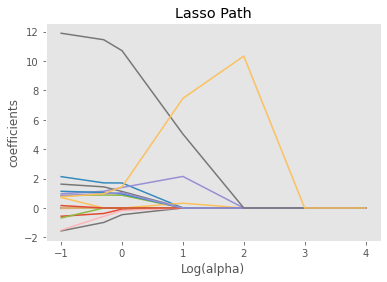

In [33]:
from itertools import cycle
from sklearn.linear_model import lasso_path

predictors_standardised = predictors/predictors.std(axis=0)

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_standardised, Life_expectancy.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000], fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

### Regression Tree

We use default values to establish a regression tree model for this dataset.

In [34]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
# if you don't remember the meaning of random_state, check out the lastest clustering workshop on Moodle
reg_tree.fit(predictors, Life_expectancy)

DecisionTreeRegressor(random_state=0)

We use the `.score()` function to check the **R2** score of the model.

In [35]:
print('R2 score:')
reg_tree.score(X=predictors, y=Life_expectancy)

R2 score:


1.0

### Random Forest

We use default values to establish a random forest model for this dataset.

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg_random_forest = RandomForestRegressor(random_state=0)
reg_random_forest.fit(predictors, Life_expectancy.values.reshape(-1))

RandomForestRegressor(random_state=0)

We use the `.score()` function to check the **R2** score of the model.

In [37]:
print('R2 score:')
reg_random_forest.score(X=predictors, y=Life_expectancy)

R2 score:


0.9870842921010248

But the random forest regressor established here may not be perfect for prediction, because there is no developement set, which we can use for hyperparameters tuning. The problem of overfitting may exist in it and the regression tree model, which means that although they have perfect scores on the **given** dataset in this notebook, but would fail to predict anything useful on **yet-unseen** dataset. This is not the focus of this analysis.

### Random Forest Classifer

#### Processing Dataset for Classification

Firstly we have to add a labelled sample of data ralated to life expectancy into the existing dataset. In this analysis, we merge a binary value of whether the life expectancy is above the average with our dataset. Then we will train a random forest classifier on this dataset and it will figure out how to create a relationship between the factors impact on life expectancy and whether the life expectancy is above the mean value in 2014. This work using random forest classifer can be helpful for us to predict the future similar datasets.

We use the following code to generate a new data set `data_for_Classifier`. In the new data set, the **'Life expectancy'** column is replaced by **'class'** column, in which **'1'** means that the life expectancy of the country is greater than or equal to the **mean** of life expectancy in the table, and **'0'** means the life expectancy of the country is less than the **mean** of life expectancy in the table.

We actually know that there are only two classes in column `'class'`, so there is no need to use the `LabelEncoder` mentioned in the workshop to encode label with value between 0 and `n_classes-1`. We also know that the variables in the dataset are already numerical.

In [38]:
# dataset for classifer
data_for_Classifier=data.copy()
data_for_Classifier['class']=np.where(data['Life expectancy ']>=data['Life expectancy '].mean(),1,0)
del data_for_Classifier['Life expectancy ']

We use the following code to see the number of rows with a life expectancy in 2 different classes.

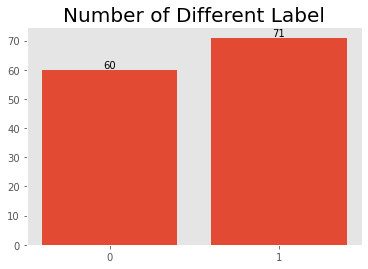

In [39]:
plt.bar(pd.value_counts(data_for_Classifier['class']).index,pd.value_counts(data_for_Classifier['class']).values)
plt.xticks([0,1])
plt.title('Number of Different Label', fontsize=20)
for a, b in zip(pd.value_counts(data_for_Classifier['class']).index,pd.value_counts(data_for_Classifier['class']).values):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=10)

We can view the new data set.

In [40]:
data_for_Classifier.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,class
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,271.0000,64,0.0100,73.5236,62.0000,492,18.6000,86,58.0000,8.1800,62.0000,0.1000,612.6965,"327,582.0000",17.5000,17.5000,0.4760,10.0000,0
Albania,0,8.0000,0,4.5100,428.7491,98.0000,0,57.2000,1,98.0000,5.8800,98.0000,0.1000,"4,575.7638","288,914.0000",1.2000,1.3000,0.7610,14.2000,1
Algeria,0,11.0000,21,0.0100,54.2373,95.0000,0,58.4000,24,95.0000,7.2100,95.0000,0.1000,547.8517,"39,113,313.0000",6.0000,5.8000,0.7410,14.4000,1
Angola,0,348.0000,67,8.3300,23.9656,64.0000,11699,22.7000,101,68.0000,3.3100,64.0000,2.0000,479.3122,"2,692,466.0000",8.5000,8.3000,0.5270,11.4000,0
Argentina,0,118.0000,8,7.9300,847.3717,94.0000,1,62.2000,9,92.0000,4.7900,94.0000,0.1000,"12,245.2565","42,981,515.0000",1.0000,0.9000,0.8250,17.3000,1


We use `train_test_split` method to split the dataset.

In [41]:
X=data_for_Classifier.iloc[:,:-1]
y=data_for_Classifier['class']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

We use following code to check the lengths of the training and testing datasets.

In [43]:
len(X_train),len(X_test),len(y_train),len(y_test)

(98, 33, 98, 33)

#### Establish Model

In [44]:
from sklearn.ensemble import RandomForestClassifier

When spliting the data set and establishing the random forest model, `random_state` is set to keep the result stable, which is convenient for discussion later. We use following code to train the classifer on taining set.

In [45]:
forest=RandomForestClassifier(n_estimators=10, random_state=123)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=123)

Use test set to get the classifcation accuracy scores.

In [46]:
pre_forest=forest.predict(X_test)

In [47]:
from sklearn import metrics
print("Classification accuracy: ")
print(metrics.accuracy_score(y_test, pre_forest))

Classification accuracy: 
0.9090909090909091


Draw the confusion matrix and display other results.

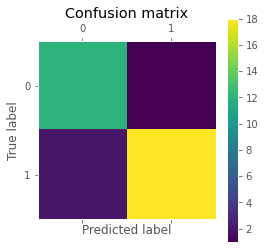

In [48]:
confusion_matrix = metrics.confusion_matrix(y_test,  pre_forest)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [49]:
print("Classification results: ")
print(metrics.classification_report(y_test, pre_forest))

Classification results: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.95      0.90      0.92        20

    accuracy                           0.91        33
   macro avg       0.90      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



#### Hyperparameter Tuning for Random Forests

There are hyperparameters in the random forest model, which need to be pre-defined before the model is trained. For example, we preset `n_estimators=10`, which represents the number of trees in the model. In fact, we cannot know the optimal number of trees for a random forest. Therefore, we need cross-validation to tune the hyperparameters of the model to promote its performance.

we use `cross_val_score` function which is a tool to tune hyperparameters with the goal of accuracy score. We set `cv_fold` as 5, which means the number of fold is 5 just like the picture below. 

![](https://github.com/huanfachen/Spatial_Data_Science/raw/main/Images/grid_search_cross_validation.png)

In [50]:
# number of fold as 5
cv_fold=5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

clf = RandomForestClassifier(n_estimators=10, random_state=123)

# call the cross_val_score function
scores = cross_val_score(clf, X_train,y_train, cv=cv_fold)
# note that this is an array
print(scores) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.85       0.9        0.9        0.78947368 0.94736842]
Accuracy: 0.88 (+/- 0.05)


We test a range of values, namely 10, 20, 30, 40, 50, 100, 200, 300, 400 to search for the best number of trees.

In [51]:
from sklearn import model_selection
parameters = {'n_estimators':[10, 20, 30, 40, 50, 100, 200, 300, 400]}
rf = RandomForestClassifier()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit( X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 100, 200, 300,
                                          400]})

When writing this notebook, the best number of trees I got is 200, and the corresponding accurate score is 0.93, which indicates that tuned hyperparameter help to improve the accuracy score.

In [52]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 100}
The best score is: 
0.9294736842105262


Fianlly, we use the tuned hyperparameter in the random forest model to get the final confusion matrix and other results.

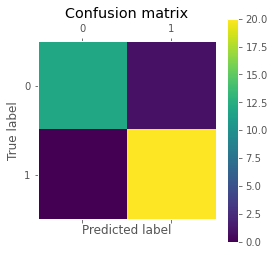

In [53]:
forest_final=RandomForestClassifier(n_estimators=200, random_state=123)
forest_final.fit(X_train,y_train)
pre_forest_final=forest_final.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,  pre_forest_final)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [54]:
print("Classification results: ")
print(metrics.classification_report(y_test, pre_forest_final))

Classification results: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.95      1.00      0.98        20

    accuracy                           0.97        33
   macro avg       0.98      0.96      0.97        33
weighted avg       0.97      0.97      0.97        33



## 6.Results and Discussion

For the simple linear regression, the fitting degree of the model is relatively good. R2 score is 0.8108, which means 81.08% of the variance in the life expectancy can be explained by the predictors used. We identify significant variables using p-values and we can find out which variables have the p-value less than 0.05 from **P>|t|** column of the OLS summary result table. Therefore in the simple linear regression model, the significant factors impact on life expectancy are **'Adult Mortality'**, **'HIV/AIDS'**, **'BMI'**, **'Status'**, **'Alcohol'** and **'Total expenditure'**. Among them, 4 variables including **'Status'**, **'Slcohol'**,  **'BMI'** and **'Total expenditure'** are positively correlated with **'Life expectancy'**. **'Adult Mortality'** and **'HIV/AIDS'** are negatively correlated with **'Life expectancy'**.

Then it comes to the Lasso moedel. When the value of `alpha` selected by `LassoCV` is 0.01712, the R2 score is 0.8825, which means Lasso model has done a great job in fitting the relationship between the response and predictors. At the sametime, the variables selected by the model (with non-zero coefficient) are 5 positively correlated variables including **'Status'**, **'percentage expenditure'**,  **'Total expenditure'**,  **'Diphtheria'**, **'Income composition of resources'** and 4 negatively correlated variables including **'Adult Mortality'**, **'under-five deaths'**, **'HIV/AIDS'** and **'thinness 5-9 years'**. And they can also explain the dependent variable, life expectancy relatively well in this model.

The weight we get does not imply importance in linear models. Because the weight can be affected by the unit change of corresponding variable. We use the results obtained by the linear regression model as an example to explain weight. When all other features remain fixed, life expectancy decreases by 0.0325 for each additional unit of **'Adult Mortality'**; life expectancy increases 0.2681 for each additional unit of **'Alcohol'**; life expectancy increases 0.0004 for each additional unit of **'percentage expenditure'**; life expectancy increases 0.0132 for each additional unit of **'Hepatitis B'**; life expectancy increases 0.0629 for each additional unit of **'BMI'**; life expectancy decreases by 0.0058 for each additional unit of **'under-five deaths'**; life expectancy increases 0.0239 for each additional unit of **'Polio'**; life expectancy increases 0.3460 for each additional unit of **'Total expenditure'**; life expectancy decreases by 1.0716 for each additional unit of **'HIV/AIDS'**, life expectancy decreases by 1.0718 for each additional unit of **'thinness 1-19 years'**. As for the categorical variable **‘Status’**, we can interpret its weight like this: when the country is a developed country, the 
predicted life expectancy is 3.0489 more compared to that in a developing country, given all other features remain fixed.

For comparison, make a bar chart of the R2 scores of all regressors. 

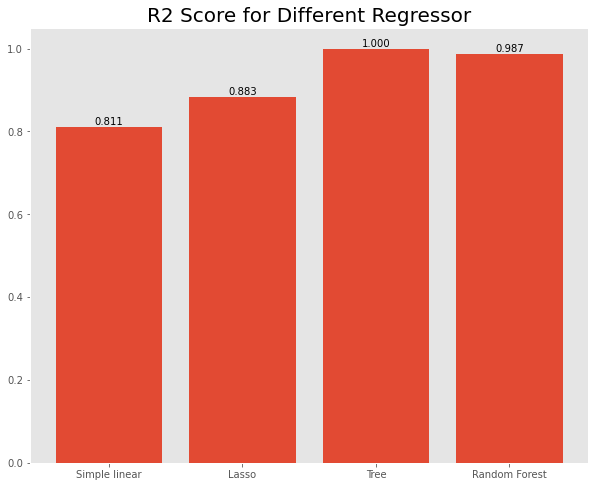

In [55]:
m=['Simple linear','Lasso','Tree','Random Forest']
r=[0.811,0.883,1,0.987]
plt.figure(figsize=(10,8))

plt.bar(m,r)
plt.title('R2 Score for Different Regressor', fontsize=20)
for a, b in zip(m, r):
    plt.text(a, b, '%.3f' % b, ha='center', va='bottom', fontsize=10)

From the R2 scores above, we can say that among the 4 models established in this notebook, regression tree model has done the best job in fitting the relationship between the response and predictors on this given dataset. As mentioned earlier, as the data set is not split, we cannot use this as a basis to estimate prediction accuracy. Overfitting is also an unavoidable problem for regression tree and random forest model.

For the random forest classifier, in my computer, the optimal number of trees determined using cross-validation is 200. Then we can try to explain the classification results. We take **'0'**, which means life expectancy is less than average value in 2014, as an example to explain results. In 13 countries with life expectancy less than average, 12 are correctly classified. Therefore, **recall** for **'0'** is 0.92. In countries classified as having life expectancy less than average, all of them actually have life expectancy less than average, so the **precision** is 1. In all 33 countries on the test set, 32 are correctly classified, so the **accuracy** score of the model on test set is 0.97.

## 7.Conclusion

The random forest classifier established on this dataset about life expectancy has good performance. It can help extracting patterns from large datasets.

From this notebook we can find that only 4 variables, **'Adult Mortality', HIV/AIDS', 'Status'** and **'Total expenditure'**, are selected by the two linear regression models and they must have huge impact on **‘life expectancy‘**. **‘life expectancy‘** decreases as adult mortality and AIDS risk increase and it increases as total health expenditure in GDP increases. The government needs to pay more attention to these aspects to increase the life expectancy of its own country. And the life expectancy in developed countries must be higher than that in developing countries which is indicated by the 2 models.

In addition, compared with previous studies, the newly added immunization related factors are newly added into the dataset for this analysis, including **'Hepatitis B'**, **'Measles'**, and **'Polio'**. But they are indeed not significant enough compared to the social factors and mortality factors mentioned above. In future studies, we may consider continuing to collect more immunization factors and then treat them as a whole variable when establish regression models.


## 8.Reference

1.Gulis, G., 2000. European Journal of Epidemiology, 16(2), pp.161-165.

2.Li, W., Maduro, G. and Begier, E., 2016. Increased Life Expectancy in New York City, 2001-2010. Journal of Public Health Management and Practice, 22(3), pp.255-264.

3.Ortiz-Ospina, E. and Beltekian, D., 2018. Why do women live longer than men?. Our World in Data, [online] Available at: <https://ourworldindata.org/why-do-women-live-longer-than-men#licence> [Accessed 15 April 2021].

4.Roser, M., Ortiz-Ospina, E. and Ritchie, H., 2013. Life Expectancy. Our World in Data, [online] Available at: <http://ttps://ourworldindata.org/life-expectancy> [Accessed 15 April 2021].

5.Sede, P. and Ohemeng, W., 2015. Socio-economic determinants of life expectancy in Nigeria (1980 – 2011). Health Economics Review, 5(1).

In [56]:
end_time = time.time()
run_time = end_time - start_time
print("Total run time: ", run_time, "seconds")

Total run time:  25.41037940979004 seconds
